<a href="https://colab.research.google.com/github/novicerruptions/Gifts-n-Smiles/blob/main/McDonald_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv #implements classes to read and write tabular data in CSV format
%matplotlib inline
# output is displayed in this juptyer notebook (inline dislay)
import matplotlib.pyplot as plt #collection of command style functions that make matplotlib work like MATLAB & data visulization
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
import copy #contains functions that are used to copy objects
import warnings # is actually a subclass of Exception
warnings.filterwarnings('ignore') #ignore this warning
from IPython.display import clear_output, Image, display #ipython functions this if it runs in different envirovement
import plotly.offline as py #users to create beautiful interactive
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go #users to create beautiful interactive
import plotly.tools as tls #users to create beautiful interactive
import sys #provides information about constants, functions and methods
import plotly.express as px  #high-level API for rapid data exploration and figure generation
import re #provides regular expression matching operations similar to those


In [2]:
mcdonald_df = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv') # Get the data

In [3]:
#View the first 5 rows of data
mcdonald_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
#View the last 10 rows of data
mcdonald_df.tail(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1443,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,50,Once a year,Female
1444,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,-3,55,Never,Male
1445,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+1,18,Once a month,Female
1446,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,+1,52,Every three months,Female
1447,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,0,43,Once a month,Male
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
# informatio of variables of the data set 
print (mcdonald_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


In [6]:
#checking for missing values
print(mcdonald_df.isnull().any())

yummy             False
convenient        False
spicy             False
fattening         False
greasy            False
fast              False
cheap             False
tasty             False
expensive         False
healthy           False
disgusting        False
Like              False
Age               False
VisitFrequency    False
Gender            False
dtype: bool


In [7]:
# to get the summary of the dataset
mcdonald_df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


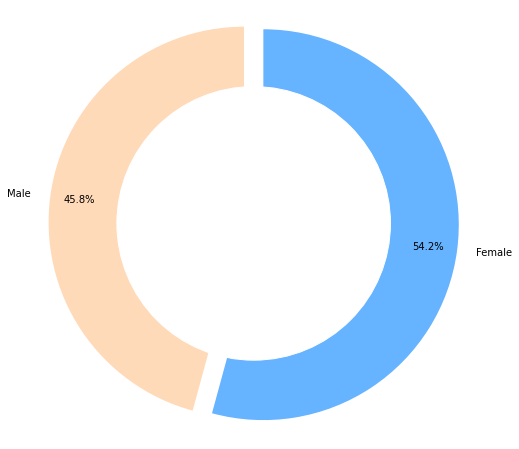

In [8]:
labels = ['Male','Female']
sizes = [mcdonald_df.query('Gender == "Male"').Gender.count(),mcdonald_df.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

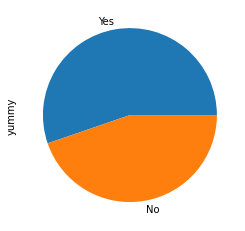

In [9]:
mcdonald_df.yummy.value_counts().plot.pie()


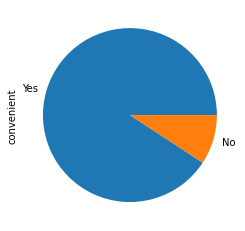

In [10]:
mcdonald_df.convenient.value_counts().plot.pie()

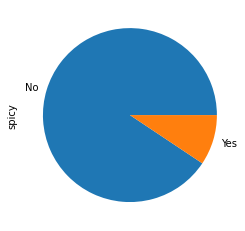

In [11]:
mcdonald_df.spicy.value_counts().plot.pie()

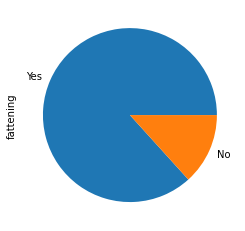

In [12]:
mcdonald_df.fattening.value_counts().plot.pie()

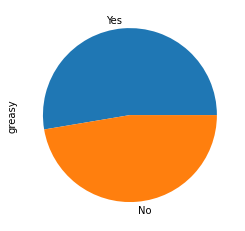

In [13]:
mcdonald_df.greasy.value_counts().plot.pie()

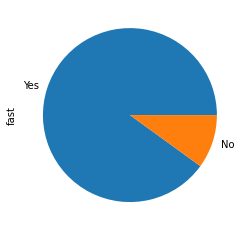

In [14]:
mcdonald_df.fast.value_counts().plot.pie()

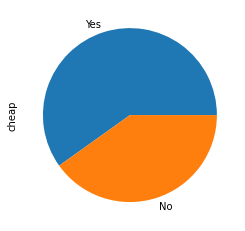

In [15]:
mcdonald_df.cheap.value_counts().plot.pie()

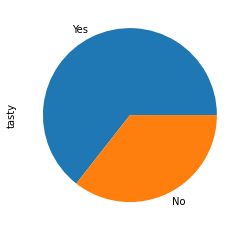

In [16]:
mcdonald_df.tasty.value_counts().plot.pie()

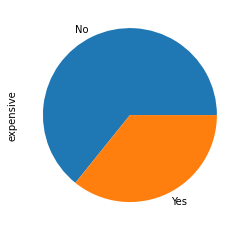

In [17]:
mcdonald_df.expensive.value_counts().plot.pie()

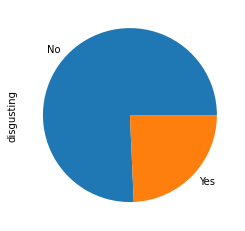

In [18]:
mcdonald_df.disgusting.value_counts().plot.pie()

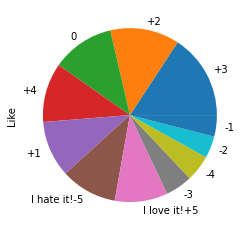

In [19]:
mcdonald_df.Like.value_counts().plot.pie()

In [20]:
#finding unique values in the VisitFrequency column
mcdonald_df.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [21]:
mcdonald_df.VisitFrequency.value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

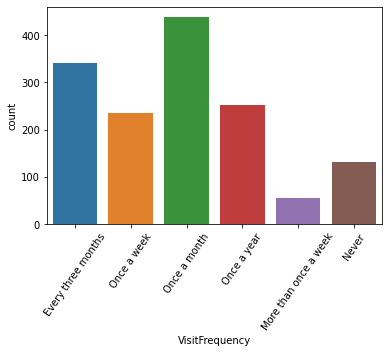

In [22]:
sns.countplot(x='VisitFrequency', data=mcdonald_df)
plt.xticks(rotation=55)

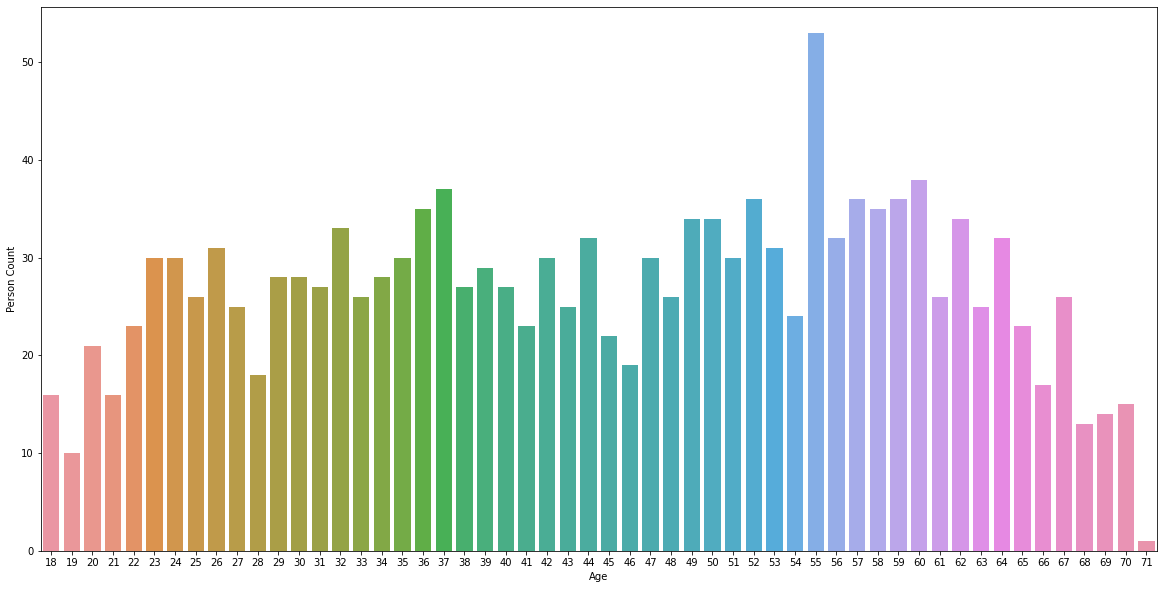

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(mcdonald_df.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcdonald_df[x] = LabelEncoder().fit_transform(mcdonald_df[x])
    return mcdonald_df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [25]:
df_eleven = mcdonald_df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [26]:
df_eleven.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


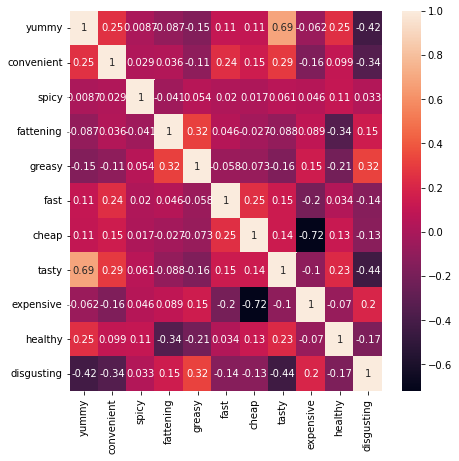

In [27]:
plt.figure(figsize=(7,7))
sns.heatmap(df_eleven.corr(), annot=True)
plt.show()

In [34]:
# Doing the principal component analyis of the segmentation variables.
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)
dx = pca.fit_transform(df_eleven)
col_names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
dx = pd.DataFrame(dx,columns = col_names)
dx

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


<BarContainer object of 11 artists>

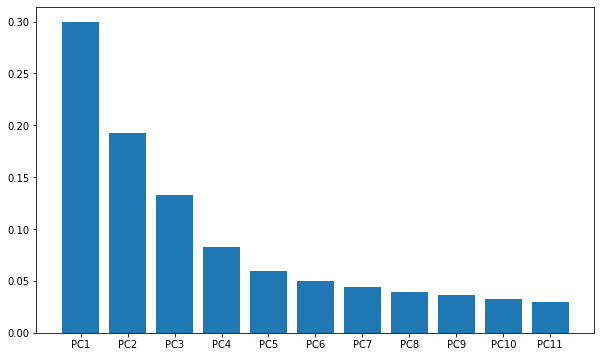

In [35]:
plt.figure(figsize = (10,6))
plt.bar(col_names,pca.explained_variance_ratio_)

In [38]:
#We do this as the data is too large in y axis therefore will not provide right clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_eleven)
scaled_data

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.339489  ,
         2.00690848, -0.56648839],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.74655335,
         2.00690848, -0.56648839],
       [-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882,  1.76526126]])

In [39]:
#KMeans Clustering
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square..distance between centroid and cluster(no.of clusters increase, wcss decreases)
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0) 
    #no. of clusters, initalizer for smarter centroid initializing, random state from saving arrangement
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) #kmeans.inertia segregate datapoints into clusters

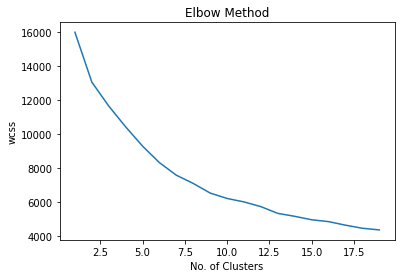

<Figure size 1080x360 with 0 Axes>

In [40]:
plt.plot(range(1,20),wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.figure(figsize=(15,5))
plt.show()

In [41]:
#Kmeans - Assuming no. of clusters are 9 as there isn't a distinct elbow
kmeans = KMeans(9)
kmeans.fit(scaled_data)

KMeans(n_clusters=9)

In [42]:
#Coordinates of centroids
kmeans.cluster_centers_

array([[ 8.99702455e-01,  2.73704093e-01, -3.21348714e-01,
         3.91375272e-01, -1.71873380e-02,  3.32950851e-01,
         6.25883469e-01,  6.75165991e-01, -6.78604090e-01,
        -4.98278824e-01, -4.29773423e-01],
       [-9.60639995e-01, -3.13740077e+00, -1.21076792e-01,
        -2.60409885e-02,  4.47635193e-01, -8.62591460e-01,
        -5.58526239e-01, -1.10184250e+00,  6.26757860e-01,
        -3.52142898e-01,  1.24061759e+00],
       [-1.11147857e+00,  3.18735180e-01, -3.21348714e-01,
         3.74822082e-01, -3.05648443e-02,  3.32950851e-01,
         5.66446535e-01, -5.59320165e-01, -6.99675996e-01,
        -4.27908394e-01, -5.66488386e-01],
       [-9.90323088e-01,  3.18735180e-01, -3.21348714e-01,
         3.20376049e-01,  5.62254082e-01,  3.32950851e-01,
        -4.17177691e-02, -9.68046306e-01,  9.54034989e-02,
        -4.68095845e-01,  1.76526126e+00],
       [ 6.43375462e-01,  2.84851495e-01, -3.21348714e-01,
         3.91375272e-01, -3.67235320e-01,  2.34821523e-01,
  

In [43]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df_eleven.columns])

In [44]:
#Labels of cluster
labels = kmeans.labels_
labels

array([2, 0, 7, ..., 6, 5, 8], dtype=int32)

In [45]:
#Making it into distinct elements
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [47]:
#Concatenating the centroid data to dataframe
df_w_centroid = pd.concat([mcdonald_df,pd.DataFrame({'centroid':labels})], axis = 1)
df_w_centroid

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,centroid
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,7
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,8
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,4
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,6
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,5


In [48]:
#Renaming the columns
df_w_centroid['segments'] = df_w_centroid['centroid']

In [50]:
#Replacing the values present under the column
df_w_centroid['segments'] = df_w_centroid['segments'].replace([0,1,2,3,4,5,6,7,8],['Segment 0', 'Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5' , 'Segment 6' , 'Segment 7' , 'Segment 8'])

In [52]:
df_w_centroid.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,centroid,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2,Segment 2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0,Segment 0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,7,Segment 7
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,Segment 0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2,Segment 2


In [53]:
df_w_centroid.pop('centroid')
df_w_centroid

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,Segment 2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,Segment 0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,Segment 7
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,Segment 0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,Segment 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,Segment 8
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,Segment 4
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,Segment 6
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,Segment 5


In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram

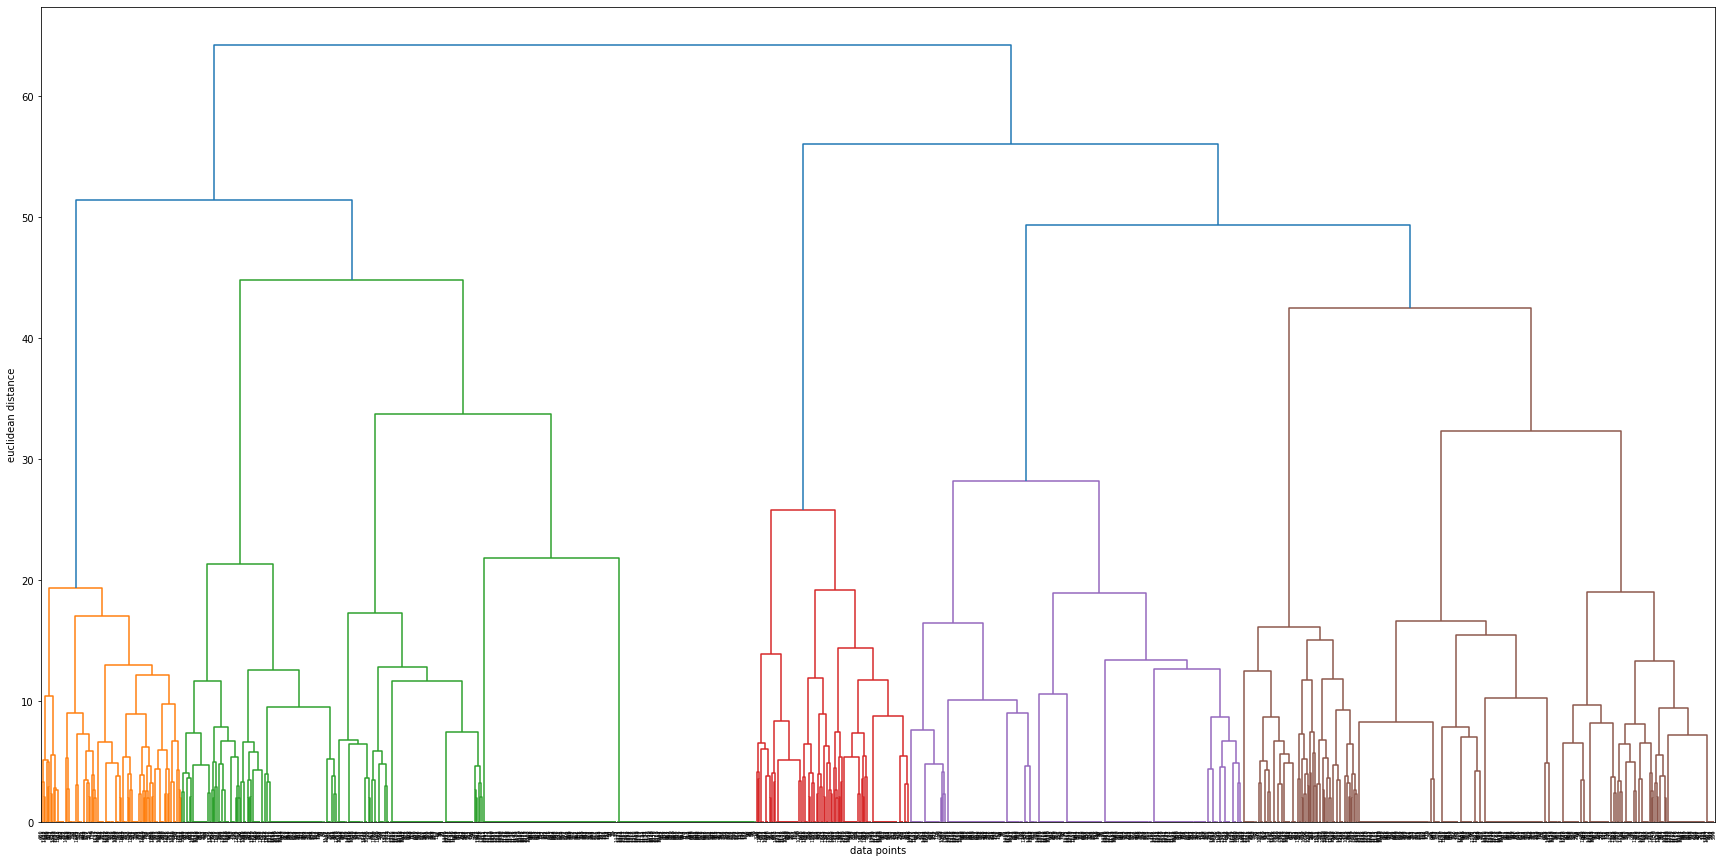

In [55]:
#create dendogram and find the best clustering value
merg = linkage(scaled_data,method="ward")
plt.figure(figsize=(30,15))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

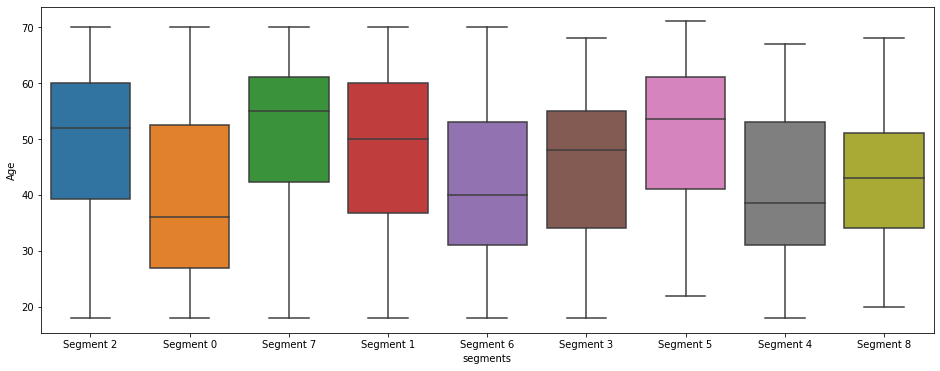

In [56]:
#barplots
plt.figure(figsize=(16,6))
sns.boxplot(x='segments',y='Age',data=df_w_centroid)